# Sintetic Software Used To Analyze of Redis' Performance

In [1]:
import redis
import time
import csv
import pandas as pd
import matplotlib.pyplot as plt

## Configuration

In [2]:
r = redis.Redis(host='localhost', port=6379, db=0)

In [3]:
r.flushdb()

True

### Variables

In [2]:
insert_time = []
sel_time = []
up_time = []

In [3]:
NBLOCK = 60
BLOCK = 500000

## Operations

### Insert

In [6]:
def insert():
    initial_time = time.time()

    for i in range(BLOCK):
        r.hset('table' + str(i), 'A0', i)
        r.hset('table' + str(i), 'A1', '1')
        r.hset('table' + str(i), 'A2', '1.2')
        r.hset('table' + str(i), 'A3', 'aaaaa')
        r.hset('table' + str(i), 'A4', 'aaaaa')
        r.hset('table' + str(i), 'A5', '11:11:11')
        r.hset('table' + str(i), 'A6', '2007-09-23')

    final_time = time.time()
    return final_time - initial_time

### Select

In [7]:
def select():
    initial_time = time.time()

    for i in range(BLOCK):
        r.hget('table' + str(i), 'A0')
        r.hget('table' + str(i), 'A1')
        r.hget('table' + str(i), 'A2')
        r.hget('table' + str(i), 'A3')
        r.hget('table' + str(i), 'A4')
        r.hget('table' + str(i), 'A5')
        r.hget('table' + str(i), 'A6')

    final_time = time.time()
    return final_time - initial_time

### Update

In [8]:
def update():
    initial_time = time.time()

    for i in range(BLOCK):
        r.hset('table' + str(i), 'A0', i)
        r.hset('table' + str(i), 'A1', '2')
        r.hset('table' + str(i), 'A2', '2.2')
        r.hset('table' + str(i), 'A3', 'aaaaaa')
        r.hset('table' + str(i), 'A4', 'bbbbb')
        r.hset('table' + str(i), 'A5', '22:22:22')
        r.hset('table' + str(i), 'A6', '2017-09-23')

    final_time = time.time()
    return final_time - initial_time

## Run operations

In [9]:
for i in range(NBLOCK):
    print(i)
    insert_time.append(insert())
    print(insert_time[i])
    sel_time.append(select())
    print(sel_time[i])
    up_time.append(update())
    print(up_time[i])
    print('-----------')

0
243.26420974731445
237.81648540496826
247.49983072280884
-----------
1
247.6038055419922
237.94240832328796
247.6546585559845
-----------
2
255.44548559188843
235.57777047157288
247.15512371063232
-----------
3
246.54174041748047
236.26833820343018
244.0175404548645
-----------
4
246.52506232261658
238.99700450897217
246.60136818885803
-----------
5
243.82764387130737
238.4361391067505
243.70227789878845
-----------
6
246.6300847530365
239.68842196464539
247.44466352462769
-----------
7
243.68746662139893
239.6123719215393
243.89527988433838
-----------
8
247.05182099342346
239.64479041099548
246.89443492889404
-----------
9
244.08160591125488
240.05302238464355
243.86379384994507
-----------
10
246.66510367393494
239.26709604263306
254.02756643295288
-----------
11
243.08341073989868
240.29509925842285
244.36368107795715
-----------
12
246.8219678401947
238.92276287078857
247.71124696731567
-----------
13
244.5384979248047
239.3978636264801
244.12073469161987
-----------
14
246.8433

### Save time lists to a csv file

In [49]:
df = pd.DataFrame(list(zip(insert_time, sel_time, up_time)),
                  columns=['Insert','Select', 'Update'])

In [50]:
df

,Insert,Select,Update
0,243.26420974731445,237.81648540496826,247.49983072280884
1,247.6038055419922,237.94240832328796,247.6546585559845
2,255.44548559188843,235.57777047157288,247.15512371063232
3,246.54174041748047,236.26833820343018,244.0175404548645
4,246.52506232261658,238.99700450897217,246.60136818885803
5,243.82764387130737,238.4361391067505,243.70227789878845
6,246.6300847530365,239.68842196464539,247.44466352462769
7,243.68746662139893,239.6123719215393,243.89527988433838
8,247.05182099342346,239.64479041099548,246.89443492889404
9,244.08160591125488,240.05302238464355,243.86379384994507


In [38]:
df.to_csv('duration.csv', index=False)

## Analysis

In [4]:
# Open csv if connection closes

with open('duration.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    
    for index, row in enumerate(reader):
        if index > 0:
            insert_time.append(row[0])
            sel_time.append(row[1])
            up_time.append(row[2])

In [5]:
time_dict = {}

time_dict['insert'] = [float(i) for i in insert_time]
time_dict['select'] = [float(i) for i in sel_time]
time_dict['update'] = [float(i) for i in up_time]

In [6]:
def calculate(time_list):
    dao = 0

    bl_list = []
    av_list = []
    dau_list = []
    dao_list = []

    for i in range(len(time_list)):
        time = float(time_list[i])
        
        dao = dao + time
        
        dao_list.append(dao)
        dau_list.append(time)
        av_list.append(time / BLOCK)
        bl_list.append(i + 1)
    
    return bl_list, av_list, dau_list, dao_list

### Insert

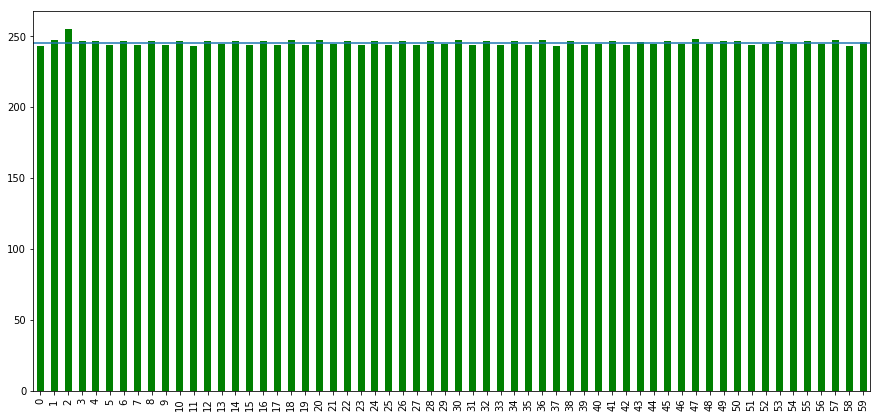

In [68]:
insert_series = pd.Series(time_dict['insert'])
mean = insert_series.mean()

fig,ax = plt.subplots()
insert_series.plot(kind = 'bar', ax = ax, color = 'g', figsize = (15, 7))

ax.axhline(mean)

In [8]:
insert = {}
insert['block'], insert['avarage'], insert['DAU'], insert['DAO'] = calculate(insert_time)

In [9]:
insert_df = pd.DataFrame(insert).set_index('block')
insert_df

,avarage,DAU,DAO
block,,,
1,0.000487,243.264210,243.264210
2,0.000495,247.603806,490.868015
3,0.000511,255.445486,746.313501
4,0.000493,246.541740,992.855241
5,0.000493,246.525062,1239.380304
6,0.000488,243.827644,1483.207947
7,0.000493,246.630085,1729.838032
8,0.000487,243.687467,1973.525499
9,0.000494,247.051821,2220.577320


### Select

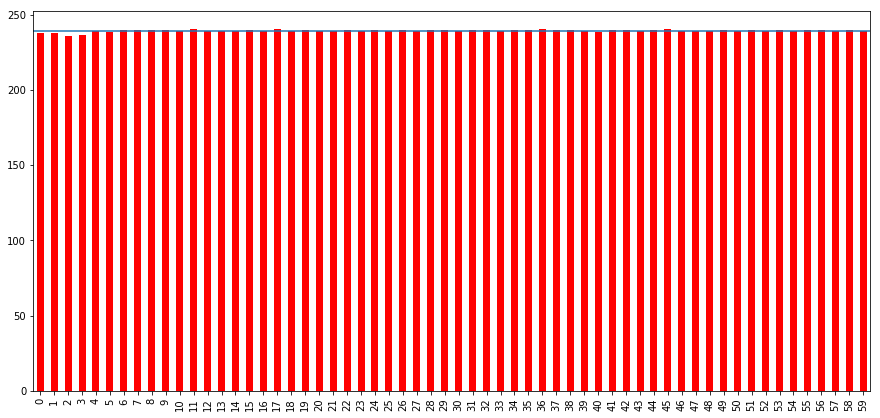

In [65]:
select_series = pd.Series(time_dict['select'])
mean = select_series.mean()

fig, ax = plt.subplots()
select_series.plot(kind = 'bar', color = 'r', figsize = (15, 7))

ax.axhline(mean)

In [11]:
select = {}
select['block'], select['avarage'], select['DAU'], select['DAO'] = calculate(sel_time)

In [12]:
select_df = pd.DataFrame(select).set_index('block')
select_df

,avarage,DAU,DAO
block,,,
1,0.000476,237.816485,237.816485
2,0.000476,237.942408,475.758894
3,0.000471,235.577770,711.336664
4,0.000473,236.268338,947.605002
5,0.000478,238.997005,1186.602007
6,0.000477,238.436139,1425.038146
7,0.000479,239.688422,1664.726568
8,0.000479,239.612372,1904.338940
9,0.000479,239.644790,2143.983730


### Plot Updates' blocks duration

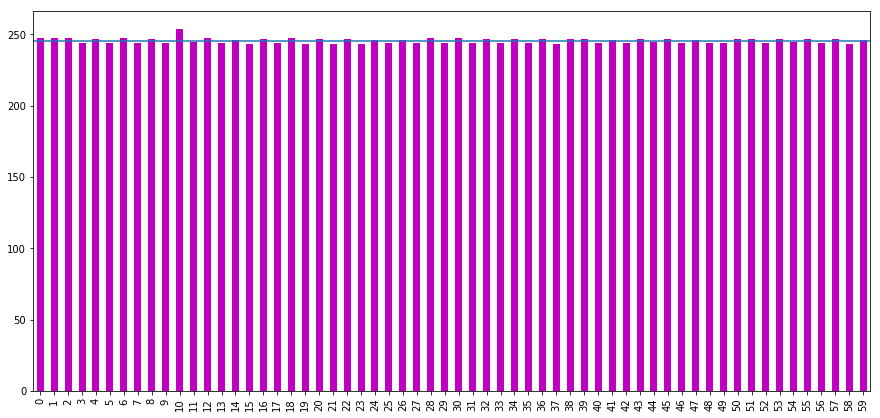

In [64]:
update_series = pd.Series(time_dict['update'])
mean = update_series.mean()

fig, ax = plt.subplots()
update_series.plot(kind = 'bar', color = 'm', figsize = (15, 7))

ax.axhline(mean)

In [14]:
update = {}
update['block'], update['avarage'], update['DAU'], update['DAO'] = calculate(up_time)

In [15]:
update_df = pd.DataFrame(update).set_index('block')
update_df

,avarage,DAU,DAO
block,,,
1,0.000495,247.499831,247.499831
2,0.000495,247.654659,495.154489
3,0.000494,247.155124,742.309613
4,0.000488,244.017540,986.327153
5,0.000493,246.601368,1232.928522
6,0.000487,243.702278,1476.630800
7,0.000495,247.444664,1724.075463
8,0.000488,243.895280,1967.970743
9,0.000494,246.894435,2214.865178


In [18]:
def insertRegression(x):
    return 0.00049093163512 * x + 9.12782245045582

In [20]:
def selectRegression(x):
    return 0.00047913525719 * x - 10.95460768622710

In [22]:
def updateRegression(x):
    return 0.00049096616731 * x + 8.31555634164579

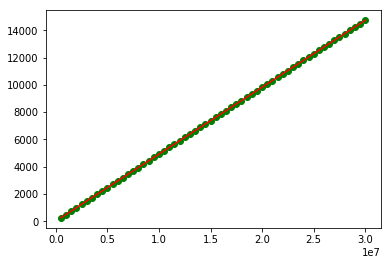

In [28]:
plt.plot([i * 500000 for i in range(1, 61)], insert['DAO'], 'go')
plt.plot([i * 500000 for i in range(1, 61)], [insertRegression(i * 500000) for i in range(1, 61)], 'r')
plt.show()

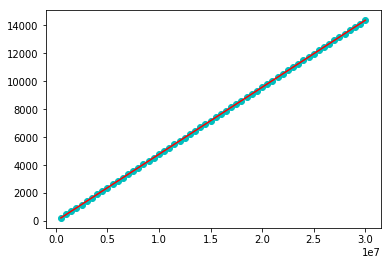

In [21]:
plt.plot([i * 500000 for i in range(1, 61)], select['DAO'], 'co')
plt.plot([i * 500000 for i in range(1, 61)], [selectRegression(i * 500000) for i in range(1, 61)], 'r')
plt.show()

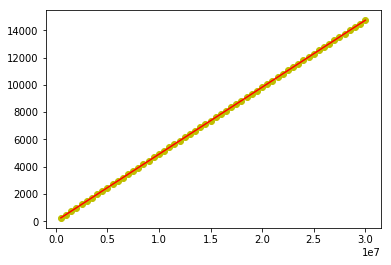

In [23]:
plt.plot([i * 500000 for i in range(1, 61)], update['DAO'], 'yo')
plt.plot([i * 500000 for i in range(1, 61)], [updateRegression(i * 500000) for i in range(1, 61)], 'r')
plt.show()